<a href="https://colab.research.google.com/github/vinicius-pf/Imersao_Dados/blob/main/Aula_04_Vinicius_PF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color=Yellow> 1. AULA

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
url_dados_resultados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')
dados_resultados = pd.read_csv(url_dados_resultados)

dados_renomeados = dados.copy()
mapa = {'droga': 'composto'}
dados_renomeados.columns = dados_renomeados.columns.str.replace("[-]", "")
dados_renomeados.rename(columns=mapa, inplace=True)

cod_compostos = dados_renomeados['composto'].value_counts().index[0:5]

dados_c = dados.loc[:,'c-0':'c-99']
dados_c_descritos = dados_c.describe()
dados_c_tranpostos = dados_c_descritos.T

dados_g = dados.loc[:,'g-0':'g-771']
dados_g_descritos = dados_g.describe()
dados_g_tranpostos = dados_g_descritos.T

In [ ]:
dados_resultados.head()

In [ ]:
dados_resultados['acetylcholinesterase_inhibitor'].unique()

In [ ]:
contagem_moa = dados_resultados.select_dtypes('int64').sum().sort_values(ascending = False)
contagem_moa

In [ ]:
contagem_linha = dados_resultados.sum(axis = 1).sort_values(ascending = False)
contagem_linha

In [39]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis = 1).sum(axis = 1)

In [40]:
dados_resultados['ativo_moa'] = (dados_resultados['n_moa']!=0)


In [41]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


In [42]:
dados_unidos = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa']], on = 'id')
dados_unidos.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [47]:
dados_unidos.query('tratamento == "com_controle"')['ativo_moa'].unique()

array([False])

In [49]:
dados_unidos.query('tratamento == "com_droga"')['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

In [101]:
composto_principal = dados_unidos['droga'].value_counts().index[:5]
composto_principal

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

In [ ]:
composto_principal = dados_unidos['droga'].value_counts().index[:5]

plt.figure(figsize=(8,12))

ax = sns.boxplot(data = dados_unidos.query('droga in @composto_principal'), y='g-0', x='droga', hue='ativo_moa')
ax.set_title("Reação dos 5 compostos mais utilizados com o G-0")
ax.set_xlabel('Nome do Composto')
plt.show()

# <font color=Yellow> 2. DESAFIOS

###Desafio 01: Descobrir os Top10 dos MOA (inhibitor, antagonist)... Usar o padrão '_'

In [190]:
unique_moa_types = np.unique([col.split('_')[-1] for col in dados_resultados.drop('id',axis=1).columns])

frequencias = dados_resultados.drop(['id','n_moa', 'ativo_moa'], axis=1).sum()
contadores = dict.fromkeys(unique_moa_types , [0])
for name in frequencias.index:
  contadores[name.split('_')[-1]] += frequencias[name]

contagem_final = pd.DataFrame.from_dict(contadores).T.rename({0:"count"},axis=1).sort_values(by='count', ascending=False)
contagem_final.head(10)

,count
inhibitor,9693
antagonist,3449
agonist,2330
blocker,323
agent,150
activator,115
local,80
antioxidant,73
anti-inflammatory,73
immunosuppressant,73


In [189]:
unique_moa_types

array(['activator', 'agent', 'agonist', 'analgesic', 'antagonist',
       'anti-inflammatory', 'antiarrhythmic', 'antibiotic',
       'anticonvulsant', 'antifolate', 'antifungal', 'antihistamine',
       'antimalarial', 'antioxidant', 'antiprotozoal', 'antiviral', 'b',
       'blocker', 'diuretic', 'donor', 'immunosuppressant', 'inhibitor',
       'laxative', 'local', 'medium', 'moa', 'scavenger', 'secretagogue',
       'sensitizer', 'steroid', 'stimulant'], dtype='<U17')

### Desafio 02: Criar coluna 'eh_controle' Usando True(1) or False(0)

In [72]:
dados_unidos['eh_controle'] = (dados_unidos['tratamento'] == 'com_controle')
dados_unidos.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,eh_controle,24_Horas,48_Horas,72_Horas
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,False,True,False,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,False,False,False,True
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,False,False,True,False
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False,False,True,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,False,False,False,True


Para conferir se foi feita corretamente, foi utilizada 
*dados_unidos['tratamento'].value_counts()* para saber qual o total de ocorrencias de 'com_controle' e *dados_unidos['eh_controle'].value_counts()* para ver as ocorrencias de 'True'

### Desafio 03: Criar 3 Colunas novas de True or False com os tempos(24/48/72)

In [70]:
dados_unidos['24_Horas'] = (dados_unidos['tempo'] == 24)
dados_unidos['48_Horas'] = (dados_unidos['tempo'] == 48)
dados_unidos['72_Horas'] = (dados_unidos['tempo'] == 72)

In [ ]:
dados_unidos.head()

### Desafio 04: Ler artigo de merge, join, concatenate

Merge() = Junta dataframe ou Serie de Objetos como um database novo. Deve-se informar se vai ser feito o merge pelas linhas ou colunas. Ao dar o eixo para se fazer o merge(), o método responde a concatenação.

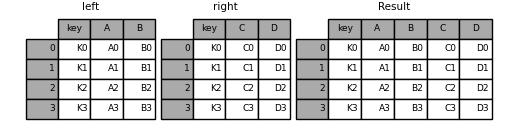

Concat() = Segundo a documentação, faz toda a operação de concatenar ao longo de um eixo, podendo utilizar uma lógica nos index. Ao concatenar com mesmo index de linha, ele entende e organiza a tabela Ele cria uma nova cópia, então se utilizar muitas vezes o método, pode se perceber perda de performance.

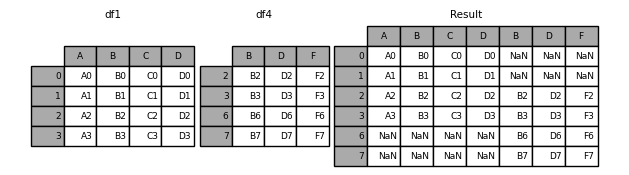

append() = pode ser usado, e surgiu antes do método concat(). Ele une os dataframe, em especial nas colunas. Caso haja index iguais, ele não organiza a tabela. 

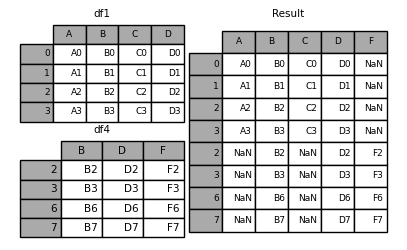

A append() pode ser utilizada tambem em strings e outros objetos em python.

### Desafio 05: Fazer analise mais detalhada, considerando tempo e dose para comparar distribuições. (Escolher uma droga específica e comparar com o controle)

Aqui é feita uma analise entre o controle a 11ª droga mais utilizada nos
experimentos no grupo gênico g-10. 

In [ ]:
composto_teste = dados_unidos['droga'].value_counts().index[10]
composto_controle = 'cacb2b860'
comparacao_desafio = [composto_teste, composto_controle]

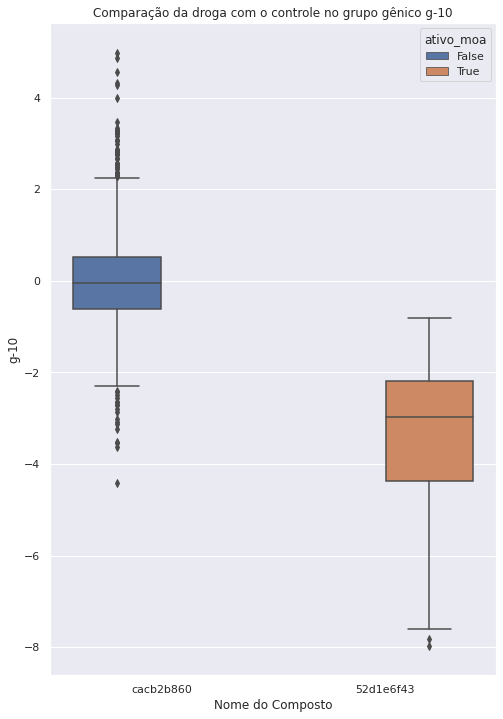

In [118]:
plt.figure(figsize=(8,12))


ax = sns.boxplot(data = dados_unidos.query('droga in @comparacao_desafio'), y='g-10', x='droga', hue='ativo_moa')
ax.set_title("Comparação da droga com o controle no grupo gênico g-10")
ax.set_xlabel('Nome do Composto')
plt.show()

Com essa analise, se percebe que a droga ativa um efeito no grupo gênico g-10. Como sabemos que há 3 valores de tempo diferentes, deve-se também analisar o efeito da droga em relação ao tempo e à dose aplicada.

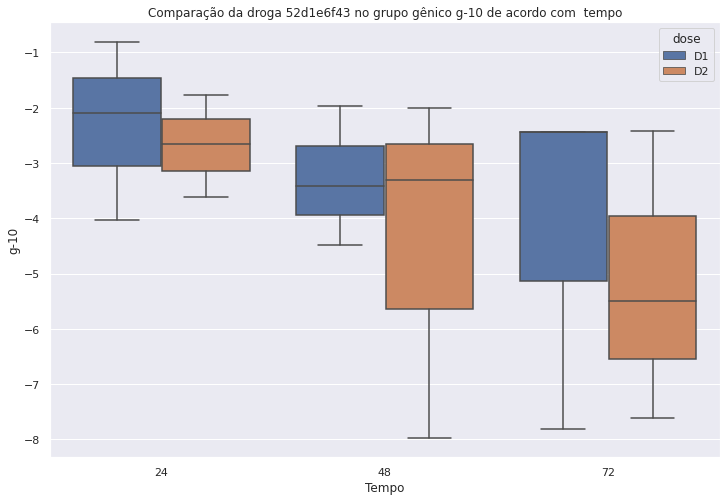

In [135]:
plt.figure(figsize=(12,8))

ax = sns.boxplot(data = dados_unidos.query('droga in @composto_teste'), y='g-10', x='tempo', hue='dose')
ax.set_title("Comparação da droga 52d1e6f43 no grupo gênico g-10 de acordo com  tempo")
ax.set_xlabel('Tempo')
plt.show()

Ao analisar o gráfico, nota-se que a Dose aplicada pode ter efeito no grupo gênico estudado. Percebe-se também que o tamanho da dose e o tempo de medição pode estar relacionado com a ativação do MOA.

### Desafio 06: Descobrir se existe composto que, ao mudar a configuração do experimento, ele muda a ativação do moa 

In [ ]:
dados_unidos.head()

In [177]:
#Testa se está ativo com a D2 e não com a D1

d1_ativo_false = dados_unidos.query('ativo_moa == False & dose == "D1"')['droga'].unique()
d2_ativo_true = dados_unidos.query('ativo_moa == True & dose == "D2"')['droga'].unique()
muda_ativo = []
for i in range(len(d1_ativo_false)):
  if d1_ativo_false[i] in d2_ativo_true:
    muda_ativo = muda_ativo.append(d1_ativo_false[i])

muda_ativo

In [ ]:
#Testa se está ativo com a D1 e não com a D2

d1_ativo_true = dados_unidos.query('ativo_moa == True & dose == "D1"')['droga'].unique()
d2_ativo_false = dados_unidos.query('ativo_moa == False & dose == "D2"')['droga'].unique()
muda_ativo = []
for i in range(len(d1_ativo_false)):
  if d1_ativo_true[i] in d2_ativo_false:
    muda_ativo = muda_ativo.append(d1_ativo_false[i])

muda_ativo    

De acordo com essa analise, acredito que não haja compostos que mudem a ativação caso a dose seja maior ou menor. A ação na célula pode ser diferente de acordo com a dose, mas não há novas ativações.

### Desafio 07 Fazer o mesmo que o 6, mas se o MOA muda de acordo com o tempo

In [183]:
#Testa se ativo apenas em 24 horas

ativo_true_24 = dados_unidos.query('ativo_moa == True & tempo == 24')['droga'].unique()
ativo_false_48 = dados_unidos.query('ativo_moa == False & dose == 48')['droga'].unique()
ativo_false_72 = dados_unidos.query('ativo_moa == False & dose == 72')['droga'].unique()
muda_ativo = []

for i in range(len(ativo_true_24)):
  if ativo_true_24[i] in ativo_false_48 or ativo_true_24[i] in ativo_false_72:
    muda_ativo = muda_ativo.append(ativo_true_24[i])

muda_ativo

[]

In [185]:
#Testa se ativo apenas em 48 horas

ativo_false_24 = dados_unidos.query('ativo_moa == False & tempo == 24')['droga'].unique()
ativo_true_48 = dados_unidos.query('ativo_moa == True & dose == 48')['droga'].unique()
ativo_false_72 = dados_unidos.query('ativo_moa == False & dose == 72')['droga'].unique()
muda_ativo = []

for i in range(len(ativo_true_48)):
  if ativo_true_48[i] in ativo_false_24 or ativo_true_48[i] in ativo_false_72:
    muda_ativo = muda_ativo.append(ativo_true_48[i])

muda_ativo

[]

In [186]:
#Testa de ativo apenas em 72 horas

ativo_false_24 = dados_unidos.query('ativo_moa == False & tempo == 24')['droga'].unique()
ativo_false_48 = dados_unidos.query('ativo_moa == False & dose == 48')['droga'].unique()
ativo_true_72 = dados_unidos.query('ativo_moa == True & dose == 72')['droga'].unique()
muda_ativo = []

for i in range(len(ativo_true_72)):
  if ativo_true_72[i] in ativo_false_48 or ativo_true_72[i] in ativo_false_24:
    muda_ativo = muda_ativo.append(ativo_true_72[i])

muda_ativo

[]

Com essa analise, percebe-se que não há ativos que ativam apenas em algum tempo especifico. As doses podem fazer efeito, e com o tempo o efeito da droga pode ser mais acentuado, mas caso a droga não ative o MOA depois de 24 horas, pode-se inferir que ela não irá ativar o MOA depois.

### Desafio 08: Resumão das analises

Além do banco de dados dos experimentos, também foi conseguido o acesso ao bando de dados dos resultados.

Novas analises podem ser feitas a partir desses novos dados, como quais compostos estão fazendo efeito nos grupos gênicos estudados ou se as doses e o tempo podem trazer resultados diferentes nas analises.

Com algumas analises, percebe-se qual o grupo de controle, que tem a id de 'cacb2b860', e com os valores dele pode-se descobrir as drogas que tiveram maior diferença nos experimentos. 

Em uma analise extra da droga de id 52d1e6f43, observa-se que o tempo e a dose aumentaram o efeito da droga no grupo gênico g-10.

Em outras analises, conclue-se que o tamanho de dose e o tempo de medição de valores não muda a ativação de determinado composto. O efeito do composto pode sim ser diferente, sendo mais ou menos efetivo, porém caso uma determinada droga tenha não tenha efeito após 24 horas, ela não terá efeito após 48. O mesmo acontece com as doses aplicadas. 